# Regression Analysis

Proper linear regression analysis on some interesting data. 

The data can be found here:  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009. The goal of this analysis is to the various properties of the wine to explain it's ultimate "quality" using a linear model.


# Name: Shravun Sunkum

In [274]:
#Here are the imports I use
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [275]:
#Using pandas, we can read the winequality data and pass it into a dataframe
df = pd.read_csv('winequality-red.csv')
#We can see some of the data with this call
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


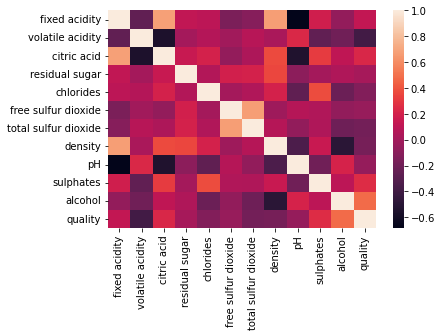

In [276]:
# .heatmap() shows us a clear graph of the correlation, which is done here
sns.heatmap(df.corr())
plt.show()

In [329]:
#I've defined a function that takes a threshold value and gives us features with correlations above this value.
def findFeature(thresh):
    absCorr = correlations.abs()
    corrList = absCorr[absCorr > thresh].index.values.tolist()
    #Based on the threshold we return the list
    return corrList

In [330]:
#Now we must call the function. After some experimentation I found a threshold value of 0.05 to be best
features = findFeature(0.05)  
x = df[features] 
y = df['quality']

In [331]:
print("Here are the features chosen: ", features)

Here are the features chosen:  ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [332]:
#Sklearn model has train_test_split() which allows us to split the data into training and testing. 
xTraining,xTesting,yTraining,yTesting=train_test_split(x,y,random_state=3)

In [333]:
# We then use linear regression to fit the data
reg = LinearRegression()
reg.fit(xTraining,yTraining)
print(reg.coef_)

[ 0.01773723 -0.99256049 -0.13962865 -1.59094279  0.00559652 -0.00351973
  0.76859036 -0.43741414  0.81288805  0.30148385]


In [334]:
#Then we predict
train_pred = reg.predict(xTraining)
print("Here is the training prediction: ")
print(train_pred)
print("\n")
test_pred = reg.predict(xTesting) 
print("Here is the testing prediction: ")
print(test_pred)
print("\n")

Here is the training prediction: 
[5.33777144 5.33826411 5.9503318  ... 6.3903182  6.19979375 5.27597259]


Here is the testing prediction: 
[5.10801475 5.65933623 5.90407267 6.13461179 5.00611866 5.44514691
 5.05735245 6.15497513 5.51919603 5.77259374 5.61809366 5.23616173
 5.23544213 5.31968644 6.47007277 5.043404   5.85287121 5.19427909
 6.07727089 6.34949018 6.42525555 5.51221957 5.8030796  4.93637817
 5.16618356 5.48255293 5.13758624 6.60000969 5.88754763 5.74133915
 6.09716961 6.29379754 4.91269821 5.88611904 5.11007273 5.94574773
 6.80685536 5.04305653 5.25438683 5.88611904 5.17406542 4.84008442
 6.48781656 5.40521715 5.31105571 5.84484462 5.7100681  5.24300809
 5.25021217 5.46398911 5.08740494 5.61369555 6.01375792 6.32497377
 5.47511954 5.36466869 5.09234555 4.92625623 5.21415941 5.08274744
 4.79570013 5.4377645  5.25237771 5.68830391 5.85145609 6.52420079
 5.38691412 5.71775637 5.17641417 5.99156845 5.6445189  5.60892012
 5.74967567 5.21702288 5.97975854 5.51115845 5.41121547

In [336]:
# The coeffecients of each feature
coeffecients = pd.DataFrame(reg.coef_,features)
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)
print("\n")
#RMSE calculation
train_rmse = metrics.mean_squared_error(train_pred, yTraining) ** 0.5
print("RMSE Training: ",train_rmse)
print("RMSE Testing: ",test_rmse)
test_rmse = metrics.mean_squared_error(test_pred, yTesting) ** 0.5
predicted_data = np.round_(test_pred)
print("\nPredicted Data: \n", predicted_data)
print('Mean Absolute Error:', metrics.mean_absolute_error(yTesting, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yTesting, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTesting, test_pred)))

                      Coeffecient
fixed acidity            0.017737
volatile acidity        -0.992560
citric acid             -0.139629
chlorides               -1.590943
free sulfur dioxide      0.005597
total sulfur dioxide    -0.003520
density                  0.768590
pH                      -0.437414
sulphates                0.812888
alcohol                  0.301484


RMSE Training:  0.6525240995947054
RMSE Testing:  0.6275381539230978

Predicted Data: 
 [5. 6. 6. 6. 5. 5. 5. 6. 6. 6. 6. 5. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5.
 5. 5. 5. 7. 6. 6. 6. 6. 5. 6. 5. 6. 7. 5. 5. 6. 5. 5. 6. 5. 5. 6. 6. 5.
 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 7. 5. 6. 5. 6. 6. 6.
 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 5. 5.
 5. 5. 5. 7. 6. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 5. 6. 6. 5. 5. 5. 5. 6. 6.
 6. 5. 5. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 7. 6. 6. 6. 5. 5. 6. 7. 5. 5.
 6. 5. 6. 6. 7. 5. 5. 5. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 6. 5.
 5. 6. 6. 7. 5. 6. 6. 5. 

In [ ]:
# We have to also check if the final regression line fits the assumptions of linear regression
# Let's see if the error terms are normally distributed!

Text(0.5, 0, 'Errors')

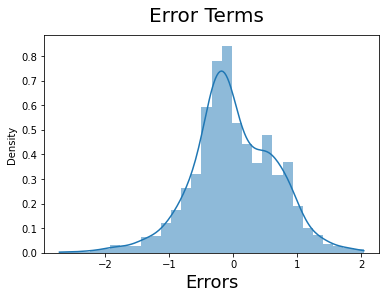

In [348]:
res = yTraining-train_pred
fig = plt.figure()
sns.histplot(res, label="100% Equities", kde=True, stat="density", linewidth=0)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

# Analysis
## Feature/Coefficients
---------------------------------
<pre>
fixed acidity            0.017737 <br/>
volatile acidity        -0.992560 <br/>
citric acid             -0.139629 <br/>
chlorides               -1.590943 <br/>
free sulfur dioxide      0.005597 <br/>
total sulfur dioxide    -0.003520 <br/>
density                  0.768590 <br/>
pH                      -0.437414 <br/>
sulphates                0.812888 <br/>
alcohol                  0.301484 <br/>
</pre>
- After applying the findFeature function with a threshold of 0.05, we can see that all of the features except residual sugar were chosen.
- After training the data I calcualted the root mean squared error for the training and the testing. To verify that this is a good model, we can see if the two values are as close as possible. If the testing is much higher, than the data hasn't been fit properly. This is why RMSE was used. 
- The RMSE Training gave us 0.6525 whereas the RMSE Testing gave a value of 0.6275 which is very close.
- The coefficients displayed above show the increased/decreased factor of wine quality from each feature.
    - For example: each unit of ph increase will decrease the wine quality by 0.437414
    - Another example: each unit of sulphate increase will also increase the wine quality by 0.81288
    - And so on for each feature!
- The final part allowed us to test for assumptions of linear regression. One assumption we tested for was to check if the error terms are normally distributed. We can see the last graph above proves this. 


# Conclusion
- After seeing the results, we can see some of the features had a positive impact in wine quality while others had a negative impact.
- Positive
    - fixed acidity
    - free sulfur dioxide
    - density
    - sulphates
    - alcohol
- Negative
    - volatile acidity
    - citric acid
    - chlorides
    - total sulfur dioxide
    - pH
- Overall, I think this regression model provides alot of vital information regarding how each of these elements listed above impact wine quality. I think the strengths of this model is the implementation of RMSE. Through my research for this problem, I found that the root-mean-square error is used to measure the difference between the values of the model that are predicted and the values that are actually observed. Since we can see that the training and test set values are very similiar. However, I think a weakness towards this model is that there aren't specific checks towards the relations between the features themselves. Meaning the independent variables could be corelated. With this in mind, future implementations could be to test for multicollinearity and also analyze the data further through PCA. 